## Applying the PPS to the Titanic dataset
- This script shows you how to apply the PPS to the Titanic dataset
- If you want to execute the script yourself, you need to have valid installations of the packages ppscore, seaborn and pandas.

In [1]:
!pip install {your_package}
!pip install --upgrade ipython

ERROR: Invalid requirement: '{your_package}'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#!pip install scikit-learn -1.0.0

In [5]:
import pandas as pd
import seaborn as sns

import ppscore as pps

In [6]:
import os

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
DATA_DIRECTORY = '/content/drive/My Drive/piconsulting/data/'

In [9]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [10]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

In [11]:
df = pd.read_csv(os.path.join(DATA_DIRECTORY,'titanic.csv'))


## Preparation of the Titanic dataset
- Selecting a subset of columns
- Changing some data types
- Renaming the column names to be more clear

In [12]:
df = df[["Survived", "Pclass", "Sex", "Age", "Ticket", "Fare", "Embarked"]]
df = df.rename(columns={"Pclass": "Class"})
df = df.rename(columns={"Ticket": "TicketID"})
df = df.rename(columns={"Fare": "TicketPrice"})
df = df.rename(columns={"Embarked": "Port"})

## Single Predictive Power Score
- Answering the question: how well can Sex predict the Survival probability?

In [13]:
pps.score(df, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'ppscore': 0.12919635510576521,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.3838383838383838,
 'model_score': 0.33424786369677695,
 'model': DecisionTreeRegressor()}

## PPS matrix
- Answering the question: which predictive patterns exist between the columns?

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

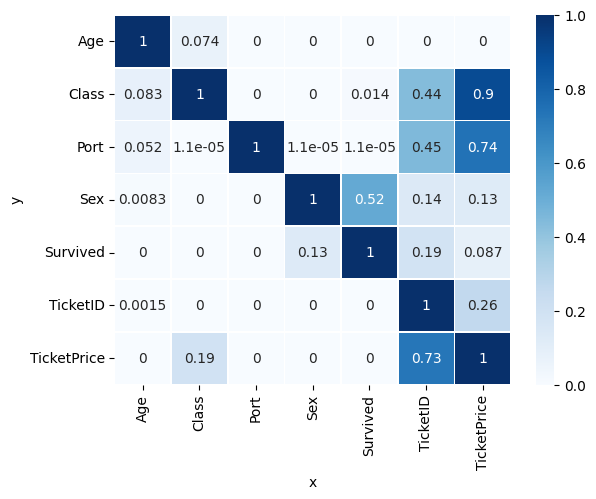

In [14]:
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [15]:
matrix = pps.matrix(df)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

In [16]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Survived,Survived,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Survived,Class,0.014171,regression,True,mean absolute error,0.691358,0.681561,DecisionTreeRegressor()
2,Survived,Sex,0.521623,classification,True,weighted F1,0.557800,0.788462,DecisionTreeClassifier()
3,Survived,Age,0.000000,regression,True,mean absolute error,11.253263,11.381220,DecisionTreeRegressor()
4,Survived,TicketID,0.000000,classification,True,weighted F1,0.003367,0.000191,DecisionTreeClassifier()
5,Survived,TicketPrice,0.000000,regression,True,mean absolute error,23.509676,26.789577,DecisionTreeRegressor()
6,Survived,Port,0.000011,classification,True,weighted F1,0.608636,0.608641,DecisionTreeClassifier()
7,Class,Survived,0.000000,regression,True,mean absolute error,0.383838,0.420680,DecisionTreeRegressor()
8,Class,Class,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,Class,Sex,0.000000,classification,True,weighted F1,0.557800,0.509074,DecisionTreeClassifier()


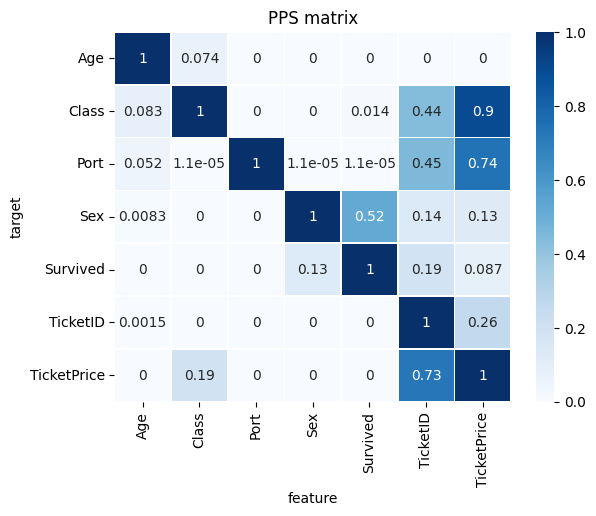

In [17]:
heatmap(matrix)

## Correlation matrix
- As a comparison to the PPS matrix

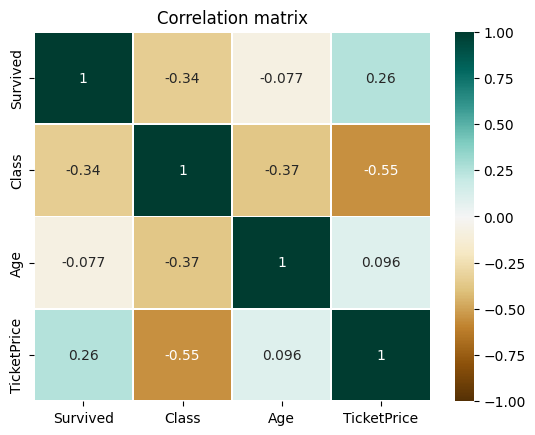

In [18]:
corr_heatmap(df.corr())